
Group Members: Sinny Ye (sy544), Brian Liu (bjl229), Caio Teig (cb733)

### Introduction

**Research Question:** How does the performance (in terms of total returns and volatility) of the US total marekt (Vanguard Total Stock Market ETF) compare to the Chinese stock market (GXC) over the past 10 years?

**Sub-Questions:**
1. Do they have a positive or negative correlation with each other? So those who invest in US could have an idea of how the chinses market would react
2. How do both react to significant economic events, such as the COVID-19 pandemic, in terms of market drop and recovery?
3. How do both ETFs react to market drops and recoveries in response to these events, and what can this tell investors about market behavior?

### Data description and cleaning

**Data Description** 

For this analysis, we used two datasets: the Vanguard Total Stock Market ETF (VTI) and the SPDR S&P China ETF (GXC). Both datasets include variables such as closing price, trading volume, opening price, daily high, and daily low.

VTI is designed to represent the overall stock market performance in the United States, while GXC is a comparable ETF that reflects the performance of the Chinese stock market. These datasets provide a comprehensive view of market trends and performance metrics for each region.


**Data Cleaning**

1. **Data Source**
   - The data for this analysis was obtained from Yahoo Finance, a widely-used and reliable platform for financial data.
   - Datasets for Vanguard Total Stock Market ETF (VTI) and SPDR S&P China ETF (GXC) were imported from CSV files.

2. **Preprocessing Steps**
   - Columns were stripped of unnecessary whitespace to avoid referencing errors during data manipulation.
   - The `Date` column was converted to a `datetime` format to enable time-series operations and align datasets by their date indices.
   - Only the `Date` and `Open` price columns were kept for further analysis, simplifying the dataset and preserving key information.
   - Data for VTI and GXC was merged using an INNER JOIN based on matching dates to ensure alignment across the time series. The merged dataset was ordered chronologically.
   - Columns were renamed to align names with their corresponding ETFs (e.g., `Open` to `VTI_Open` and `GXC_Open`).

3. **Feature Engineering**
   - Daily returns were calculated for both VTI and GXC using the percentage change method. Missing values (arising from the first-day calculation) were filled with `0`.
   - Key statistics (mean, standard deviation, minimum, and maximum) were calculated for daily returns of both ETFs and stored in a summary DataFrame.
   - Cumulative returns for VTI and GXC were calculated, allowing a clear visualization of long-term performance trends.
   - Dates were converted to ordinal values to facilitate modeling or plotting on normalized scales.

<string>:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


           Date     VTI    GXC
0    2014-11-20  105.07  77.72
1    2014-11-21  106.85  80.12
2    2014-11-24  106.65  80.47
3    2014-11-25  106.92  80.37
4    2014-11-26  106.77  81.02
...         ...     ...    ...
2487 2024-10-10  283.78  84.06
2488 2024-10-11  283.97  82.23
2489 2024-10-14  286.86  82.67
2490 2024-10-15  288.32  80.48
2491 2024-10-16  286.72  79.35

[2492 rows x 3 columns]


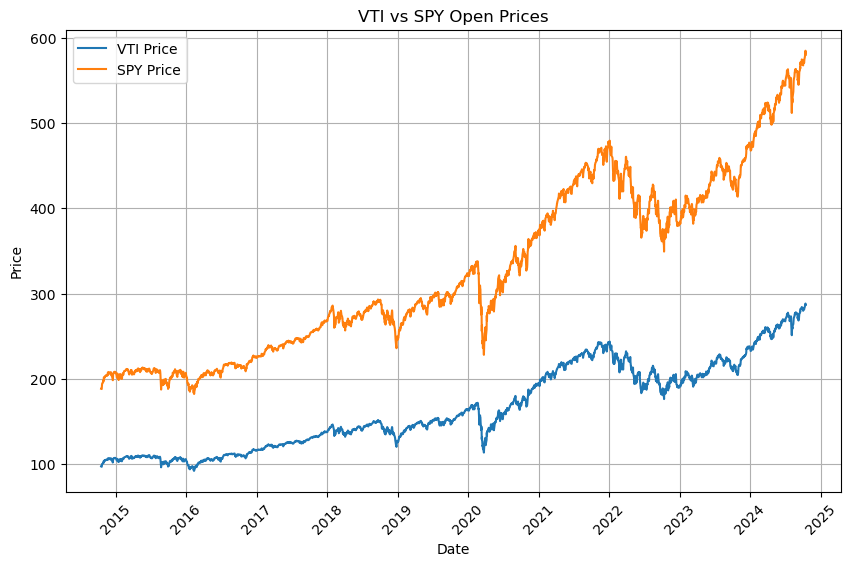

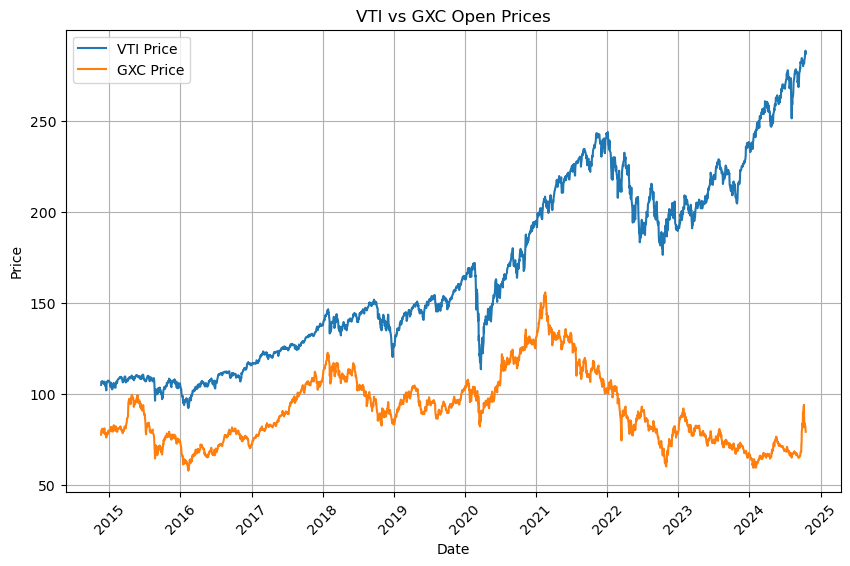

            Statistic       VTI       SPY
0                Mean  0.000489  0.000503
1  Standard Deviation  0.010912  0.010595
2             Minimum -0.086744 -0.087994
3             Maximum  0.066885  0.063489
            Statistic       VTI       GXC
0                Mean  0.000463  0.000142
1  Standard Deviation  0.010941  0.016349
2             Minimum -0.086744 -0.123187
3             Maximum  0.066885  0.141191


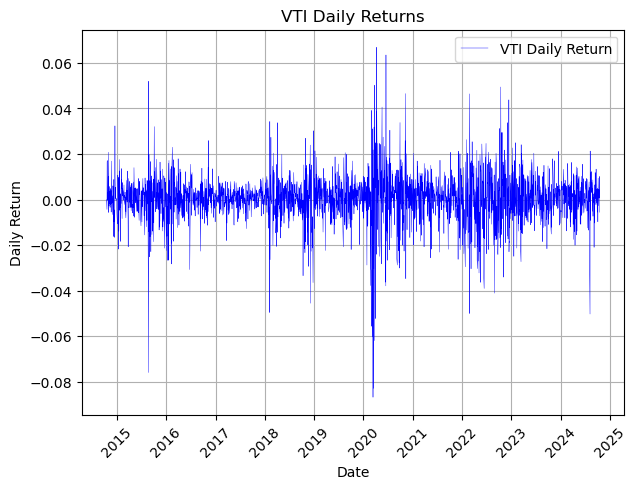

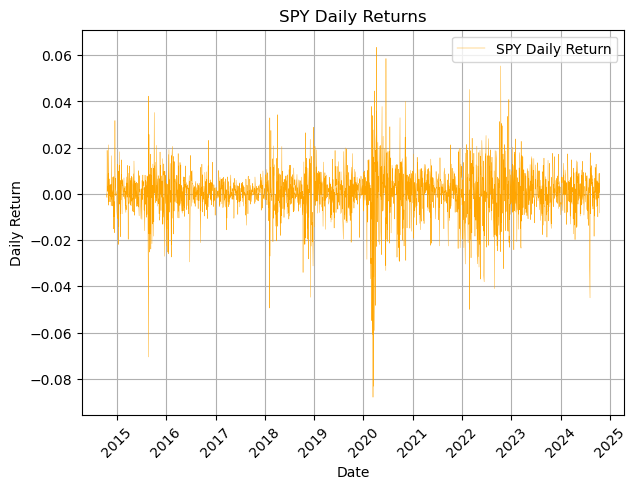

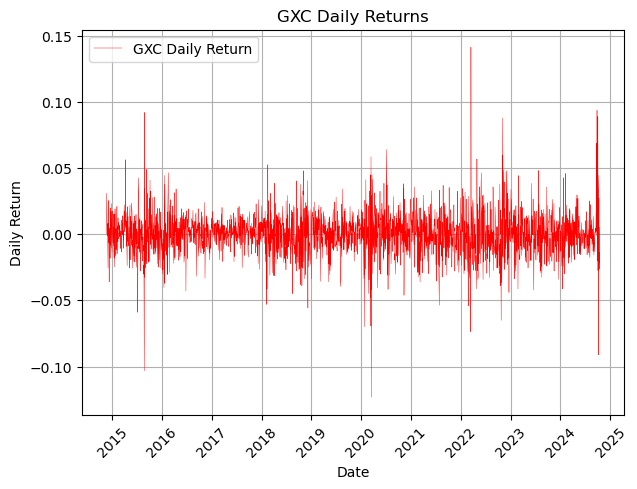

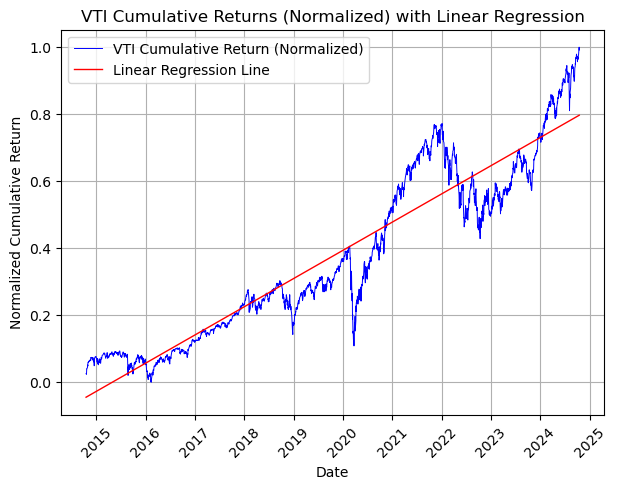

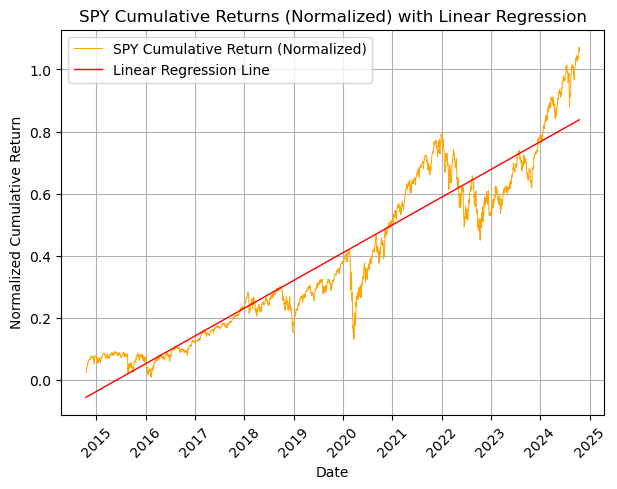

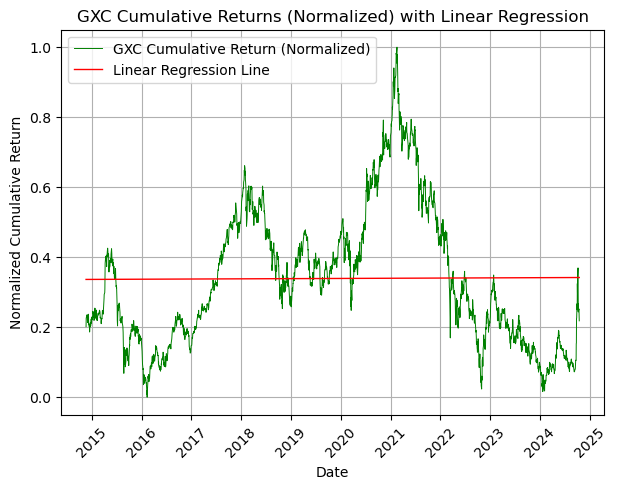

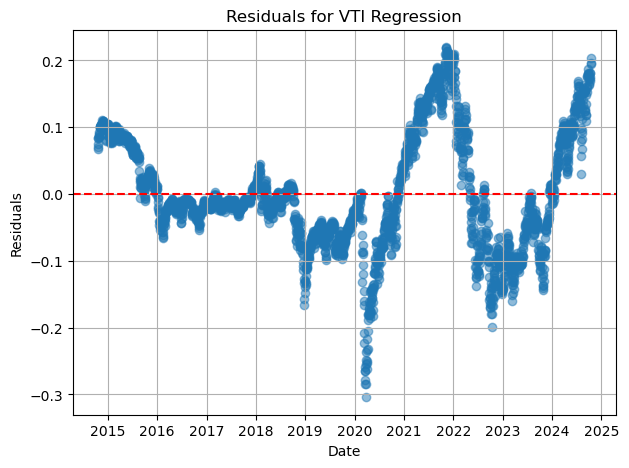

95% confidence interval for the regression coefficient: -9.608187770151951e-06, 8.647684275155327e-06


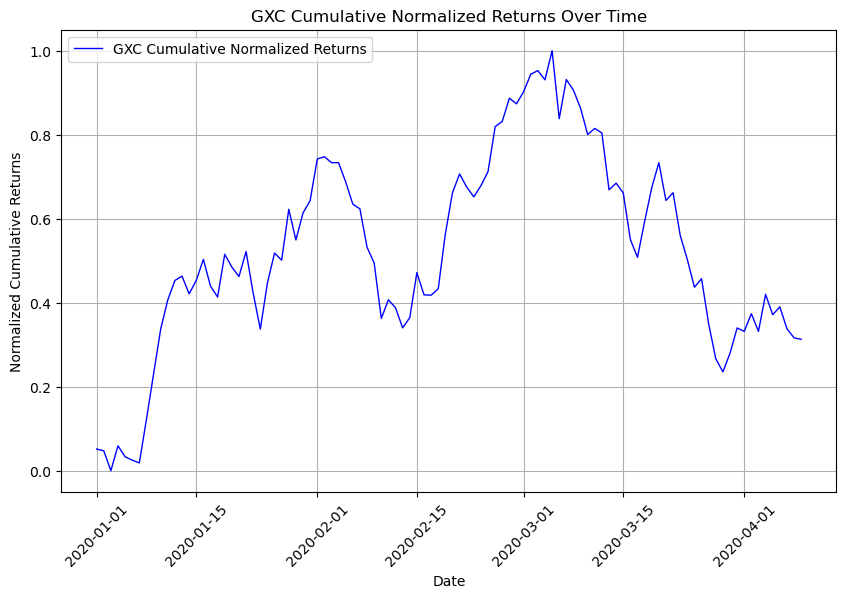

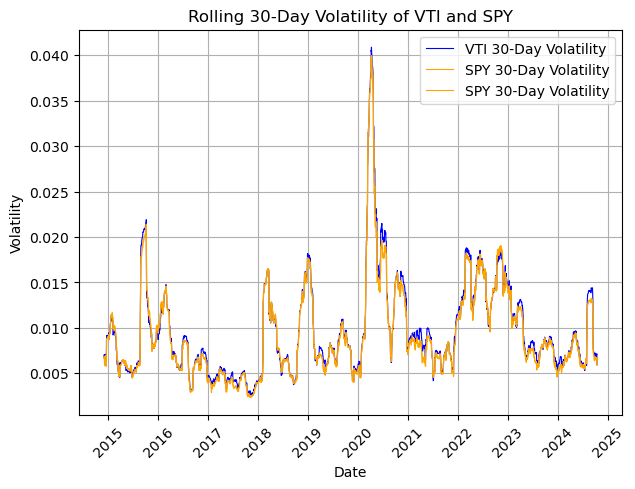

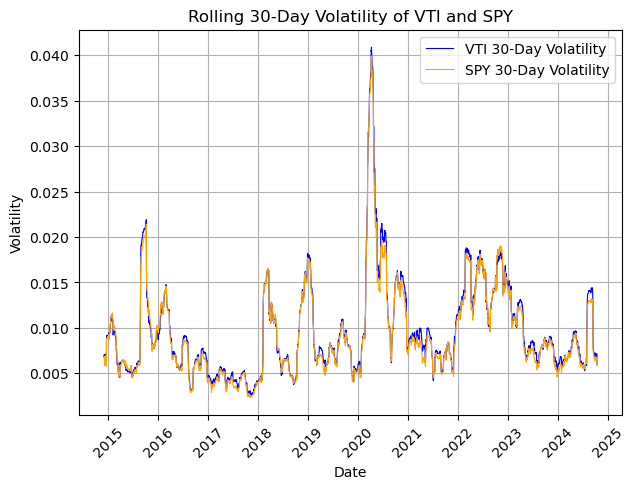

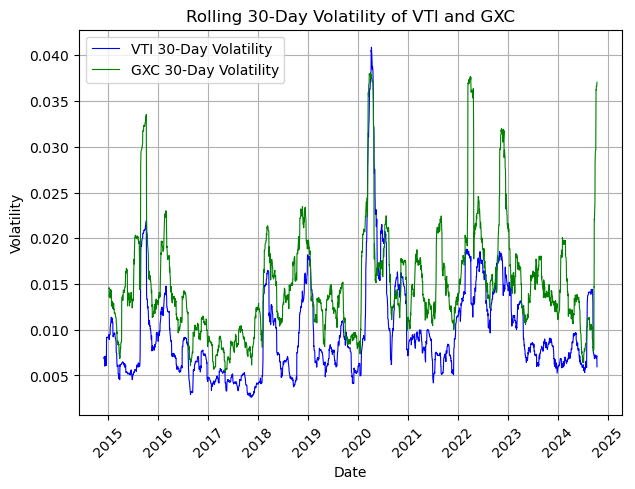

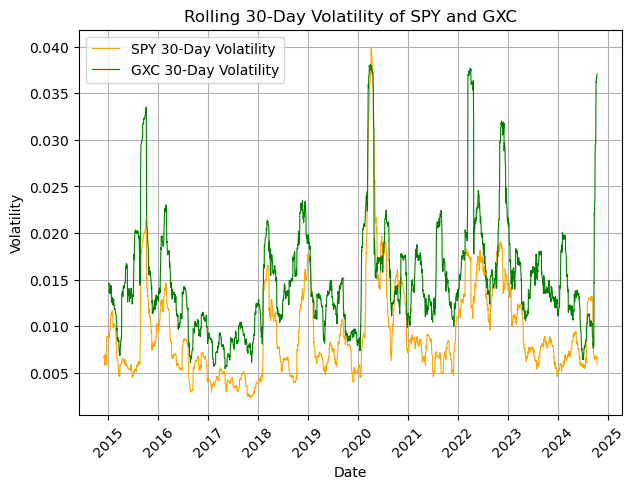

KeyError: 'GXC_Cumulative'

In [1]:
!pip install import-ipynb
import import_ipynb
import phase2

### Preregistration statement

**Preregister Statement 1:**

<u>Hypothesis:</u> VTI demonstrates a faster recovery rate than GXC following the COVID-19 pandemic. 

<u>Rationale for Hypothesis:</u>  
* VTI recovered faster than GXC after the COVID-19 pandemic because the U.S. stock market benefited from strong government support, such as stimulus payments and lower interest rates, which boosted business growth and investor confidence. VTI includes a wide range of companies, especially in tech and e-commerce, which thrived during the pandemic. In contrast, GXC, which represents the Chinese market, faced challenges like stricter lockdowns, slower reopening, and government crackdowns on key industries. As a result, VTI bounced back quickly and kept growing steadily, while GXC’s recovery was slower and more unstable.

<u>Analysis:</u> 
* Run a linear regression with time as the input variable (X), and cumulative returns for GXC and VTI during the recovery period after the COVID pandemic as output (Y). The slope of the regression model will indicate the recovery rate, therefore we will be testing whether BGXC > BVTIp


**Preregister Statement 2:**

<u>Hypothesis:</u> VTI’s ETF (1) outperforms GXC’s ETF over the past 10 years in terms of total returns (2) while providing lower volatility . 

<u>Rationale for Hypothesis:</u> 
* VTI has performed better than GXC over the past 10 years by providing higher total returns and lower volatility. The U.S. stock market, represented by VTI, has grown consistently, driven by strong sectors like technology and healthcare. In contrast, GXC, which focuses on the Chinese market, has faced slower growth and challenges like stricter government regulations and economic uncertainty. VTI is also less volatile because it includes a broader range of companies, making it more stable, while GXC experiences larger swings due to risks specific to China. Overall, VTI offers better growth with less risk, making it a more reliable investment.

<u>Analysis:</u> 
* Performance analysis : calculate the growth rate of both VTi and GXC over the 10 year period and run a paired t-test where X= ETF type and Y = percentage growth over the 10 years. This allows us to compare whether the mean growth rate for VTI is greater than GXC. If β-VTI > β-GXC with statistical significance (p < 0.05), we can conclude that VTI outperformed GXC in total returns.
* Volatility analysis :First, calculate the returns for each time period to determine the mean and standard deviation of returns for each ETF. The ETF with the lower standard deviation has lower volatility. Next, analyze the risk-adjusted performance using the Sharpe Ratio, assuming a risk-free rate of 4%. A higher Sharpe Ratio indicates better risk-adjusted performance, meaning the ETF provides more return per unit of risk. Lastly, plot the average returns (Y) against the standard deviation (X) to compare the Sharpe Ratios for VT and GXC. If VT has higher returns and lower volatility than GXC, you can conclude that VT offers superior performance with lower risk. Furthermore, if VT has a higher Sharpe Ratio, this supports the conclusion that VT is the better option for risk-adjusted returns.



### Data analysis

**Statement 1:**

Date used for "end of COVID": On **May 13, 2021**, the Centers for Disease Control and Prevention (CDC) announced a significant update to its public health guidelines:

* Fully Vaccinated Individuals: The CDC stated that people who are fully vaccinated against COVID-19 no longer need to wear masks or practice physical distancing in most indoor and outdoor settings.
* National Impact: This change signaled a major shift in the U.S. pandemic response and was a strong indicator of returning to pre-pandemic normalcy.

In [ ]:
#Importing Total Index from Phase2 Notebook and setting the start of the recovery period
TotalIndex = phase2.TotalIndexNew
recovery_start_date = "2021-05-13"
TotalIndex = TotalIndex[TotalIndex['Date'] >= recovery_start_date]

# Linear Regression for VTI
vti_min = TotalIndex['VTI_Cumulative'].min()
vti_max = TotalIndex['VTI_Cumulative'].max()
TotalIndex['VTI_Cumulative_Normalized'] = (TotalIndex['VTI_Cumulative'] - vti_min) / (vti_max - vti_min)

x_vti = TotalIndex['Date_Ordinal'].values.reshape(-1, 1)
y_vti_cum_norm = TotalIndex['VTI_Cumulative_Normalized'].values


from sklearn.linear_model import LinearRegression
vti_model = LinearRegression()
vti_model.fit(x_vti, y_vti_cum_norm)
vti_pred_cum_norm = vti_model.predict(x_vti)

# Linear Regression for GXC
gxc_min = TotalIndex['GXC_Cumulative'].min()
gxc_max = TotalIndex['GXC_Cumulative'].max()
TotalIndex['GXC_Cumulative_Normalized'] = (TotalIndex['GXC_Cumulative'] - gxc_min) / (gxc_max - gxc_min)

x_gxc = TotalIndex['Date_Ordinal'].values.reshape(-1, 1)
y_gxc_cum_norm = TotalIndex['GXC_Cumulative_Normalized'].values

gxc_model = LinearRegression()
gxc_model.fit(x_gxc, y_gxc_cum_norm)
gxc_pred_cum_norm = gxc_model.predict(x_gxc)

# Extract the slopes of the regression lines
B_VTI = vti_model.coef_[0]
B_GXC = gxc_model.coef_[0]

print("VTI Recovery Rate (Slope):", B_VTI)
print("GXC Recovery Rate (Slope):", B_GXC )

# Plot both regression lines
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Plot SPY and VTI normalized cumulative returns
plt.plot(TotalIndex['Date'], TotalIndex['GXC_Cumulative_Normalized'], color='red', label='GXC Cumulative Return (Normalized)')
plt.plot(TotalIndex['Date'], TotalIndex['VTI_Cumulative_Normalized'], color='green', label='VTI Cumulative Return (Normalized)')

# Plot regression lines
plt.plot(TotalIndex['Date'], gxc_pred_cum_norm, color='red', label=f'GXC Linear Regression Line (Slope: {B_GXC:.4f})', linewidth=1)
plt.plot(TotalIndex['Date'], vti_pred_cum_norm, color='green', label=f'VTI Linear Regression Line (Slope: {B_VTI:.4f})', linewidth=1)

plt.title('SPY vs. VTI Cumulative Returns (Normalized) with Linear Regression')
plt.xlabel('Date')
plt.ylabel('Normalized Cumulative Return')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

### Evaluation of significance

### Conclusions

### Limitations

### Acknowledgements and Bibliography

1 Group Member is not a native english speaker

https://www.investopedia.com/terms/s/sell-in-may-and-go-away.asp#:~:text=%22Sell%20in%20May%20and%20go%20away%22%20is%20an%20adage%20referring,6.3%25%20from%20November%20to%20April.